In [1]:
# Sistema Experto para Autos Familiares
# Autor: Juan Angel Vizcarra Aldana

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


In [3]:
# Definición de variables difusas
consumo = ctrl.Antecedent(np.arange(5, 21, 1), 'consumo')  # L/100km
consumo['bajo'] = fuzz.trapmf(consumo.universe, [5, 5, 7, 9])
consumo['medio'] = fuzz.trimf(consumo.universe, [8, 11, 14])
consumo['alto'] = fuzz.trapmf(consumo.universe, [13, 16, 20, 20])

espacio = ctrl.Antecedent(np.arange(200, 601, 10), 'espacio')  # litros
espacio['reducido'] = fuzz.trapmf(espacio.universe, [200, 200, 300, 350])
espacio['amplio'] = fuzz.trimf(espacio.universe, [300, 400, 500])
espacio['muy_amplio'] = fuzz.trapmf(espacio.universe, [450, 500, 600, 600])

seguridad = ctrl.Antecedent(np.arange(1, 6, 1), 'seguridad')  # NCAP
seguridad['baja'] = fuzz.trapmf(seguridad.universe, [1, 1, 2, 3])
seguridad['media'] = fuzz.trimf(seguridad.universe, [2, 3, 4])
seguridad['alta'] = fuzz.trapmf(seguridad.universe, [3, 4, 5, 5])

idoneidad = ctrl.Consequent(np.arange(0, 101, 1), 'idoneidad')
idoneidad['poco_adecuado'] = fuzz.trimf(idoneidad.universe, [0, 20, 40])
idoneidad['regular'] = fuzz.trimf(idoneidad.universe, [30, 50, 70])
idoneidad['bueno'] = fuzz.trimf(idoneidad.universe, [60, 75, 90])
idoneidad['excelente'] = fuzz.trimf(idoneidad.universe, [80, 90, 100])


In [4]:
# Reglas difusas
reglas = [
    ctrl.Rule(consumo['bajo'] & espacio['muy_amplio'] & seguridad['alta'], idoneidad['excelente']),
    ctrl.Rule(consumo['medio'] & espacio['amplio'] & seguridad['alta'], idoneidad['bueno']),
    ctrl.Rule(consumo['alto'] | espacio['reducido'], idoneidad['poco_adecuado']),
    ctrl.Rule(consumo['medio'] & espacio['reducido'], idoneidad['regular']),
    ctrl.Rule(espacio['amplio'] & seguridad['media'], idoneidad['bueno']),
    ctrl.Rule(consumo['bajo'] & seguridad['media'], idoneidad['regular']),
    ctrl.Rule(consumo['alto'] & seguridad['baja'], idoneidad['poco_adecuado']),
]
sistema_ctrl = ctrl.ControlSystem(reglas)


In [5]:
# Evaluación de autos
autos = {
    "Toyota Sienna": (8.5, 500, 5),
    "Chevrolet Aveo": (13, 300, 3),
    "Honda CR-V": (7.8, 460, 4),
    "Volkswagen Jetta": (6.5, 400, 4),
    "Kia Rio": (6.7, 325, 3)
}

resultados = {}

for nombre, (c, e, s) in autos.items():
    try:
        sistema_sim = ctrl.ControlSystemSimulation(sistema_ctrl)
        sistema_sim.input['consumo'] = c
        sistema_sim.input['espacio'] = e
        sistema_sim.input['seguridad'] = s
        sistema_sim.compute()

        if 'idoneidad' in sistema_sim.output:
            resultados[nombre] = sistema_sim.output['idoneidad']
        else:
            print(f"❌ No se generó salida para {nombre}")
            resultados[nombre] = None
    except Exception as e:
        print(f"❌ Error al evaluar {nombre}: {e}")
        resultados[nombre] = None

print("\n=== RESULTADOS ===")
for nombre, valor in resultados.items():
    print(f"{nombre:<20}: {valor:.1f}/100" if valor is not None else f"{nombre:<20}: ❌ No evaluado")


❌ No se generó salida para Volkswagen Jetta

=== RESULTADOS ===
Toyota Sienna       : 90.0/100
Chevrolet Aveo      : 30.5/100
Honda CR-V          : 90.0/100
Volkswagen Jetta    : ❌ No evaluado
Kia Rio             : 42.6/100


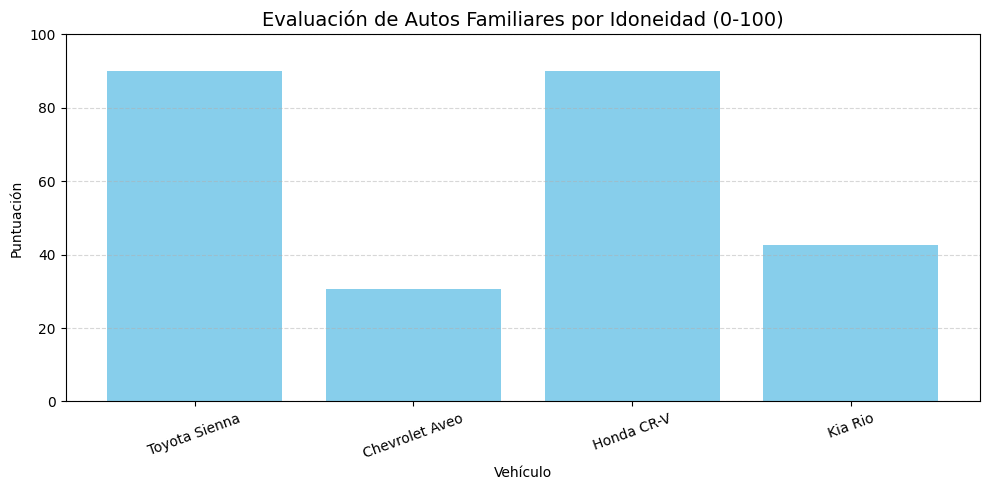

In [6]:
# Gráfica de resultados (solo autos con puntuación válida)
import matplotlib.pyplot as plt

autos_validos = {k: v for k, v in resultados.items() if v is not None}

plt.figure(figsize=(10, 5))
autos = list(autos_validos.keys())
puntajes = list(autos_validos.values())

plt.bar(autos, puntajes, color='skyblue')
plt.title('Evaluación de Autos Familiares por Idoneidad (0-100)', fontsize=14)
plt.xlabel('Vehículo')
plt.ylabel('Puntuación')
plt.ylim(0, 100)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()